### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Инструкция по выполнению проекта

Мне предоставлена база данных games.csv, в которых содержатся данные для каждой игры, описание которых содержит:

        Name — название игры
        Platform — платформа
        Year_of_Release — год выпуска
        Genre — жанр игры
        NA_sales — продажи в Северной Америке (миллионы проданных копий)
        EU_sales — продажи в Европе (миллионы проданных копий)
        JP_sales — продажи в Японии (миллионы проданных копий)
        Other_sales — продажи в других странах (миллионы проданных копий)
        Critic_Score — оценка критиков (максимум 100)
        User_Score — оценка пользователей (максимум 10)
        Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

In [1]:
# Загружаю библиотеки

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

### Шаг 1. Первичный анализ данных

In [2]:
# Присваиваю базу данных к датафрейму
try:
    df = pd.read_csv(r'./datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
# Провожу первичный анализ
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [4]:
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


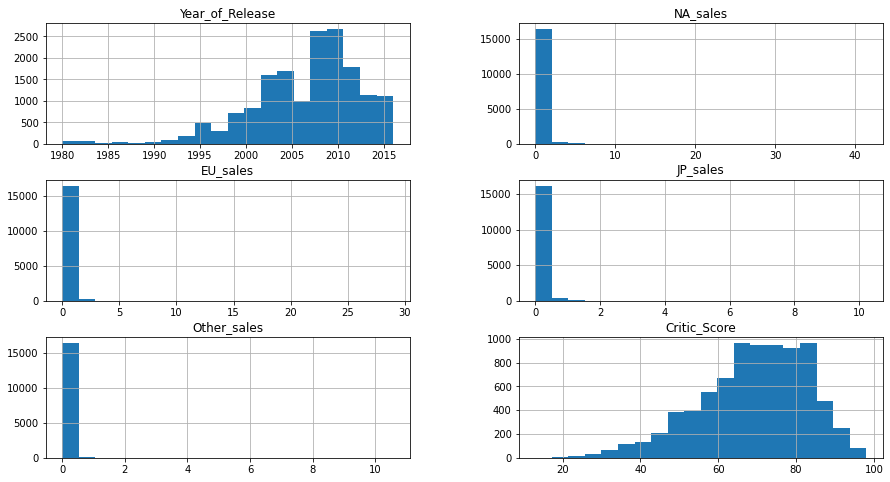

In [5]:
df.hist(bins=20, figsize=(15,8));

Исходя из первичного осмотра, могу сделать следующий вывод:

    1) Необходимо привести названия столбцов в нижний регистр
    2) Пропуски в этих данных трудно восстановить
    3) Отфильтровать аномальные значения по продажам
    4) Типы данных в year_of_release и user_score необходимо исправить
    5) Проверить на дубликаты

### Шаг 2. Предобработка

In [6]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# Преобразую год в float значение, т.к. есть пропуски
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64') 

In [8]:
# Проверяю долю пропусков в данных
display(df.isna().sum())
pd.DataFrame(round(df.isna().mean()*100,1))

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

,0
name,0.0
platform,0.0
year_of_release,1.6
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,54.6


In [9]:
# Проверю пропуски в столбце 'namе'
display(df.loc[df['name'].isna()])
# Нашел 2 'пустые' записи из 16 715, поэтому спокойно могу их удалить
df.dropna(subset=['name'], inplace=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# Проверю пропуски в столбце 'year_of_release'
display(df.loc[df['year_of_release'].isna()])
# 1.6% могу позволить удалить
df.dropna(subset=['year_of_release'], inplace=True)
# Преобразую год в Int
df['year_of_release'] = df['year_of_release'].astype('int32')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
# Нахожу явные дубликаты по имени, платформе, году выпуска
display(df.loc[df.duplicated(subset=['name','platform','year_of_release'], keep=False)])
df = df.drop_duplicates(subset=['name','platform','year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [12]:
# Заполняю пропуски в rating значением unknown
df['rating'] = df['rating'].fillna('unknown')

In [13]:
# Подсчитываю сумму всех продаж и добавляю в новый столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Считаю, что данные были успешно предобработаны, учтены дубликаты, пропуски, неверные типы и также были удалены небольшой процент пустых значений. Приступаю к исследовательскому анализу данных.

### Шаг 3. Исследовательский анализ данных

In [41]:
# Вывожу сводную таблицу с годами / продажами
year_sales = df.drop_duplicates(subset=['year_of_release', 'name'])
year_sales = year_sales.pivot_table(index='year_of_release',\
                                    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                                    aggfunc=['count', 'sum'])
year_sales.columns = year_sales.columns.droplevel()
year_sales.columns = ['tmp', 'tmp', 'tmp', 'tmp', 'count', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
year_sales = year_sales.loc[:,['count', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]
year_sales.tail(10) 

,count,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,,,,,,
2007,884,119.30,58.60,228.53,58.87,465.30
2008,1039,129.66,57.56,250.07,51.21,488.50
2009,1001,137.45,59.06,243.50,48.06,488.07
2010,900,120.46,56.06,220.46,40.74,437.72
2011,779,105.49,48.77,161.76,33.98,350.00
2012,446,74.87,49.06,98.48,25.03,247.44
2013,335,72.83,43.27,88.87,23.38,228.35
2014,319,72.24,33.89,67.24,22.23,195.60
2015,362,66.63,30.10,62.47,21.71,180.91


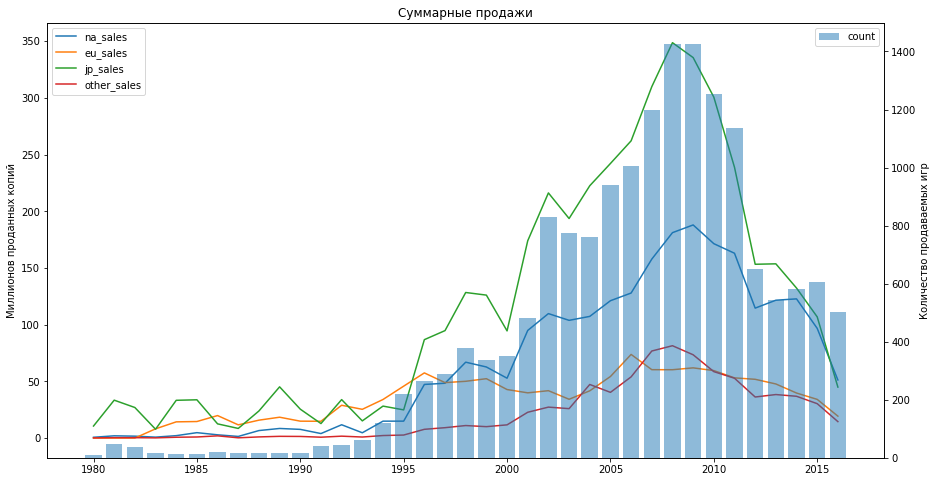

In [15]:
# Строю из этих данных график для визуализации
fig, ax = plt.subplots(figsize=(15,8))
ax1 = ax.twinx()

for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    ax.plot(year_sales[i], label=i)
ax1.bar(x=year_sales.index, height=year_sales['count'], alpha=0.5, label='count')
ax.set_ylabel('Миллионов проданных копий')
ax1.set_ylabel('Количество продаваемых игр')
plt.xlabel('Год выпуска игры')
plt.title('Суммарные продажи')
ax.legend(loc = 'upper left')
ax1.legend()

Данные до 1994 года, не представляют большого интереса, т.к. продаж в данном отрезке было значительно мало, чем после него

In [42]:
# Вывожу сводную таблицу с платформами / продажами и распределяю по годам
platform_sales = df.groupby(['year_of_release', 'platform'])\
['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum()
display(platform_sales.tail(20))

na_sales  eu_sales  jp_sales  other_sales  \
year_of_release platform                                              
2014            XOne         30.97     18.15      0.14         4.81   
2015            3DS           6.17      5.06     15.52         1.03   
                PC            2.36      5.57      0.00         0.59   
                PS3           4.99      6.04      3.67         2.12   
                PS4          42.37     51.76      6.31        18.46   
                PSP           0.00      0.00      0.12         0.00   
                PSV           0.39      0.69      4.85         0.32   
                Wii           0.43      0.62      0.00         0.09   
                WiiU          6.76      5.01      3.45         1.13   
                X360          7.36      3.50      0.00         1.10   
                XOne         36.03     18.47      0.17         5.47   
2016            3DS           4.14      2.33      8.03         0.64   
                PC            1.36      3.53      0.00         0.36   
                PS3           0.67      1.26      1.30         0.37   
                PS4          21.49     31.78      5.74        10.24   
                PSV           0.15      0.39      3.56         0.15   
                Wii           0.06      0.11      0.00         0.01   
                WiiU          2.10      1.48      0.67         0.35   
                X360          0.69      0.71      0.00         0.12   
                XOne         14.27      9.63      0.01         2.24   

                          total_sales  
year_of_release platform               
2014            XOne            54.07  
2015            3DS             27.78  
                PC               8.52  
                PS3             16.82  
                PS4            118.90  
                PSP              0.12  
                PSV              6.25  
                Wii              1.14  
                WiiU            16.35  
                X360            11.96  
                XOne            60.14  
2016            3DS             15.14  
                PC               5.25  
                PS3              3.60  
                PS4             69.25  
                PSV              4.25  
                Wii              0.18  
                WiiU             4.60  
                X360             1.52  
                XOne            26.15

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


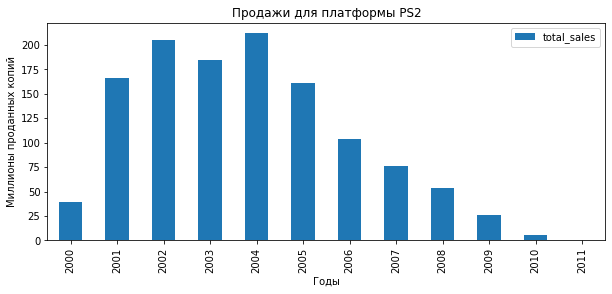

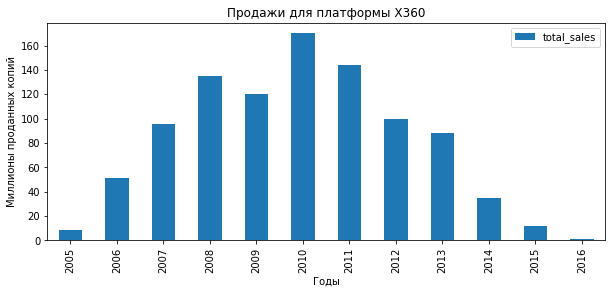

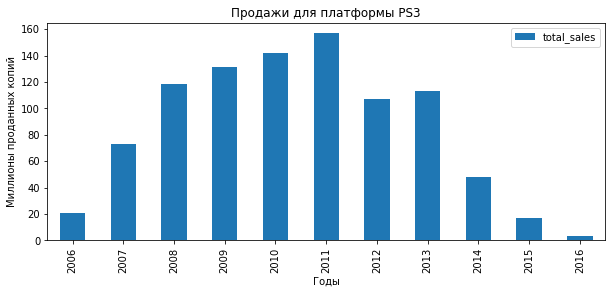

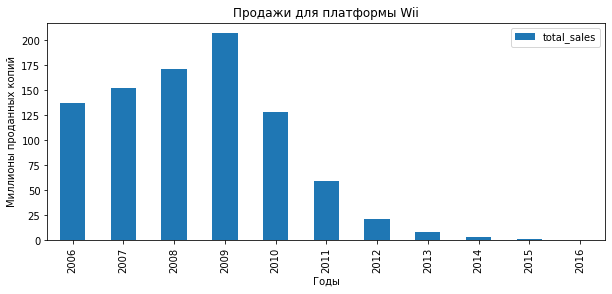

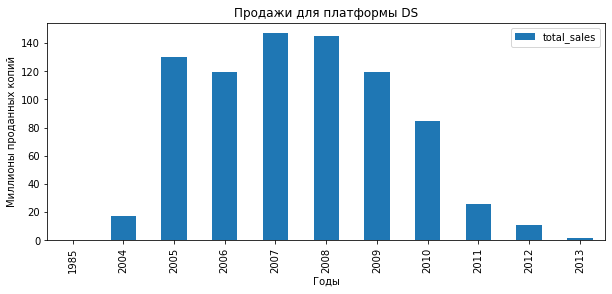

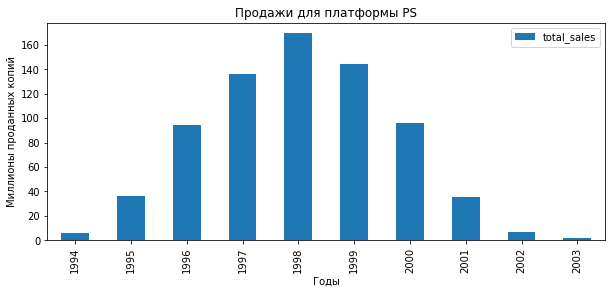

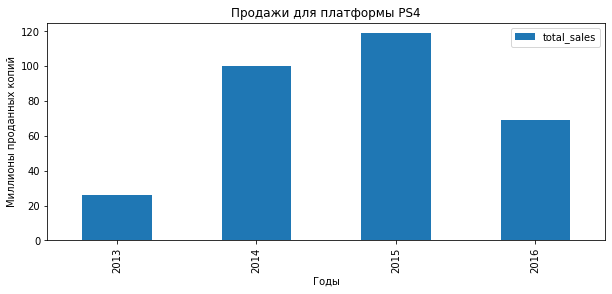

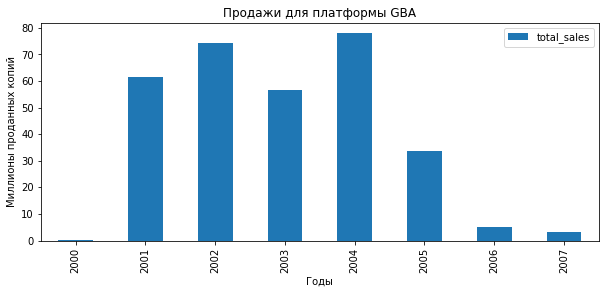

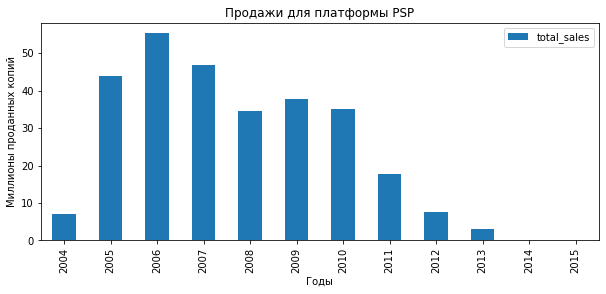

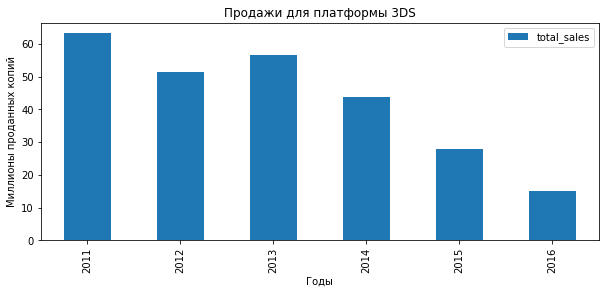

In [17]:
# Определяю топ продаваемых платформ
platform_total_sells = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                        .sort_values('total_sales', ascending=False).head(10)
display(platform_total_sells)
# Строю графики для каждой платформы, чтобы определить годы жизни каждой из них
for i in platform_total_sells.index:
    df.loc[df['platform']==i].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
        .plot(kind='bar', figsize=(10,4))
    plt.title(f'Продажи для платформы {i}')
    plt.xlabel('Годы')
    plt.ylabel('Миллионы проданных копий')
    

Изучив данные графики, можно выявить, что актуальность платформ держатся около 10 лет, после чего их заменяют новые. До пика популярности проходит около 4-х лет, после продажи начинают падать. 
Новые платформы появляются примерно каждые 6 лет.

In [18]:
# По графику продаж игр, я беру отрезок от 2012 года, т.к. значения за эти года очень схожи, из-за чего прогноз 
# будет более точен
correct_df = df.loc[df['year_of_release'] >= 2012] 

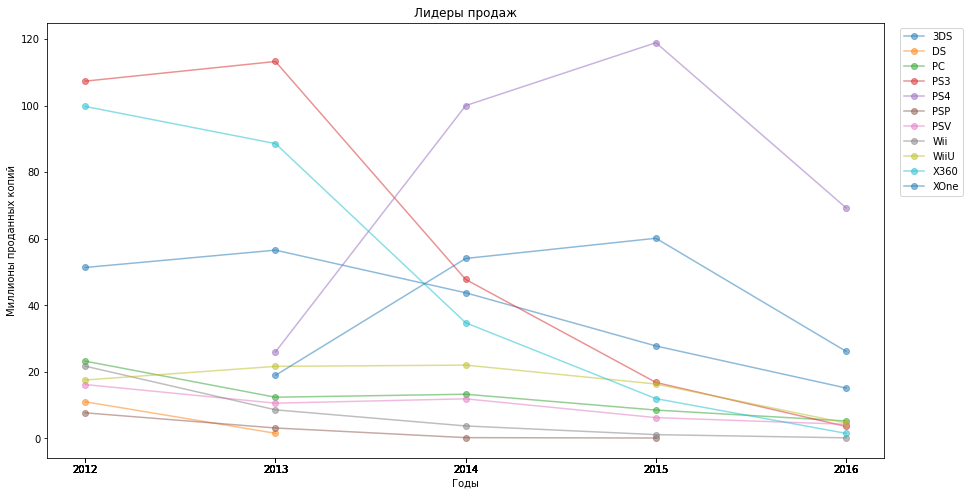

In [45]:
# Строю график по актуальному отрезку для изучения лидирующих платформ
correct_platform_sales = correct_df.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')\
                                    .reset_index()

fig, ax = plt.subplots(figsize=(15,8))
for i in sorted(correct_platform_sales['platform'].unique()):
    plt.plot(correct_platform_sales.loc[correct_platform_sales['platform']==i]['year_of_release'],
                correct_platform_sales.loc[correct_platform_sales['platform']==i]['total_sales'],
                alpha=0.5, marker='o', label=i)
    plt.title('Лидеры продаж')
    plt.xlabel('Годы')
    plt.ylabel('Миллионы проданных копий')
    plt.xticks(correct_platform_sales['year_of_release'])
    plt.legend(bbox_to_anchor=(1.1, 1))
    

Падения на 16 годе можно обьяснить тем, что год еще не был завершен, поэтому делаю следующий вывод:
Лидерами продаж на данный момент являются PS4, XOne
PS3 и X360 начинают падать в популярности из-за их новых версий.

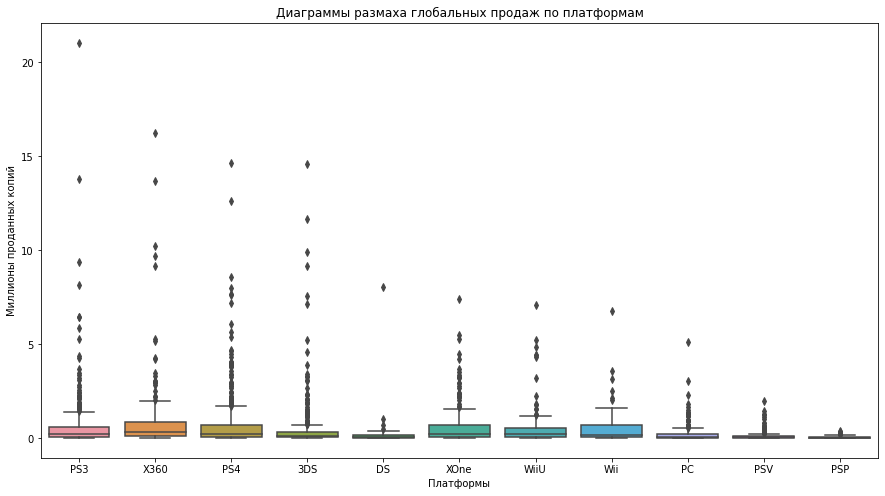

In [48]:
# Строю графики с "усами" по разбивке по платформам без ограничения
plt.subplots(figsize=(15,8))
sns.boxplot(x='platform', y='total_sales', data=correct_df)
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')
plt.title('Диаграммы размаха глобальных продаж по платформам')
plt.show()

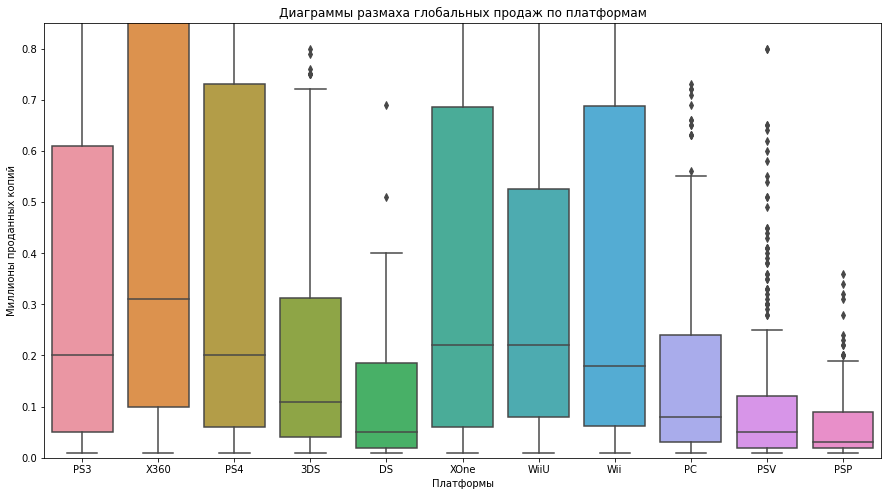

In [47]:
# Строю графики с "усами" по разбивке по платформам с ограничением по высоте
plt.subplots(figsize=(15,8))
sns.boxplot(x='platform', y='total_sales', data=correct_df)
plt.ylim(0,0.85)
plt.xlabel('Платформы')
plt.ylabel('Миллионы проданных копий')
plt.title('Диаграммы размаха глобальных продаж по платформам')
plt.show()

In [60]:
# Вывожу данные в виде таблицы
correct_df.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


На данном графике за последние 4 года, лидерами по продажам являются Х360, PS3, PS4, XOne и WiiU
Оутсайдерами являются DS, PSP, PSV, PC.

Влияние отзывов пользователей и критиков на продажи платформы PS3


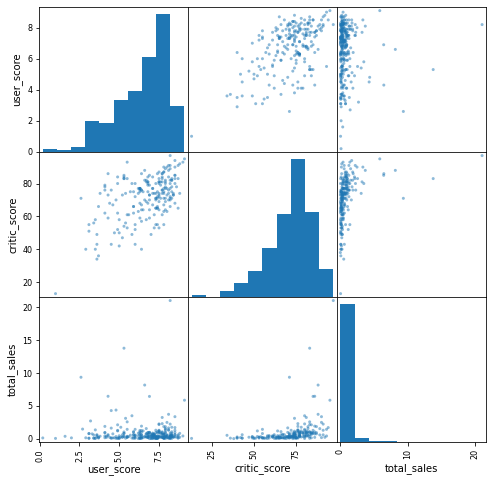

,user_score,critic_score,total_sales
user_score,1.000000,0.544510,-0.006206
critic_score,0.544510,1.000000,0.334152
total_sales,-0.006206,0.334152,1.000000


Влияние отзывов пользователей и критиков на продажи платформы X360


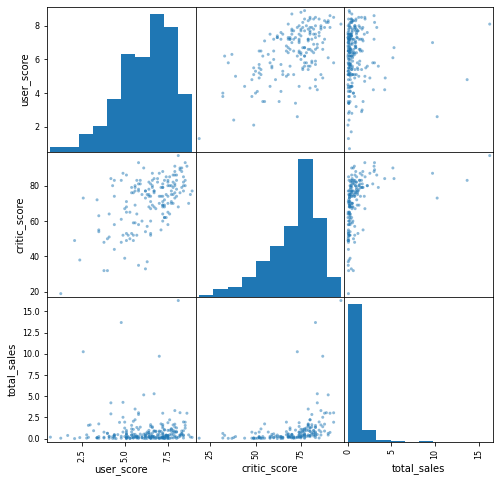

,user_score,critic_score,total_sales
user_score,1.000000,0.557352,0.006164
critic_score,0.557352,1.000000,0.360573
total_sales,0.006164,0.360573,1.000000


Влияние отзывов пользователей и критиков на продажи платформы PS4


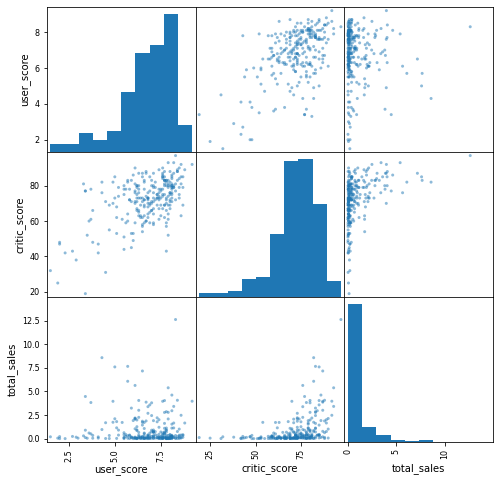

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


Влияние отзывов пользователей и критиков на продажи платформы 3DS


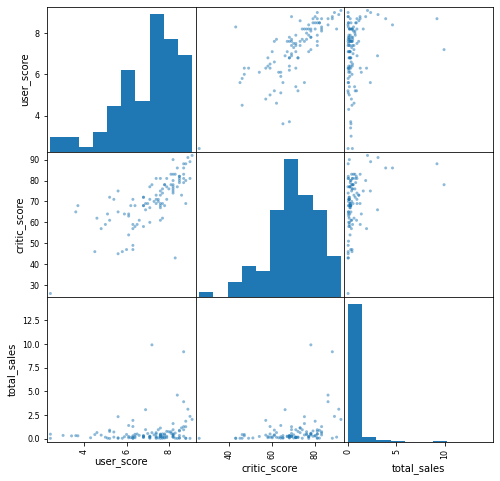

,user_score,critic_score,total_sales
user_score,1.000000,0.722762,0.197583
critic_score,0.722762,1.000000,0.320803
total_sales,0.197583,0.320803,1.000000


Влияние отзывов пользователей и критиков на продажи платформы DS


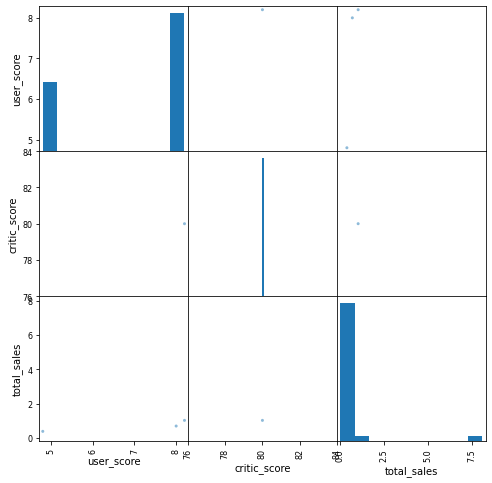

,user_score,critic_score,total_sales
user_score,1.000000,NaN,0.882709
critic_score,NaN,NaN,NaN
total_sales,0.882709,NaN,1.000000


Влияние отзывов пользователей и критиков на продажи платформы XOne


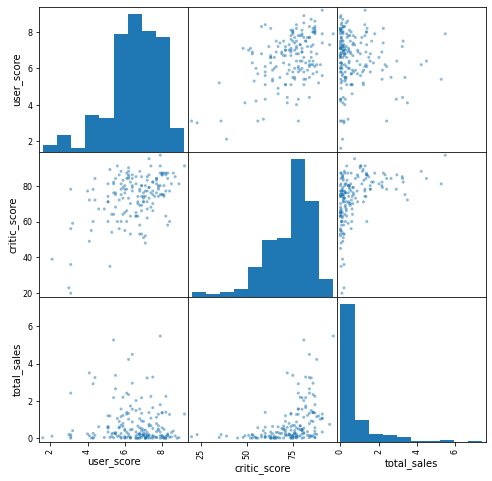

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


Влияние отзывов пользователей и критиков на продажи платформы WiiU


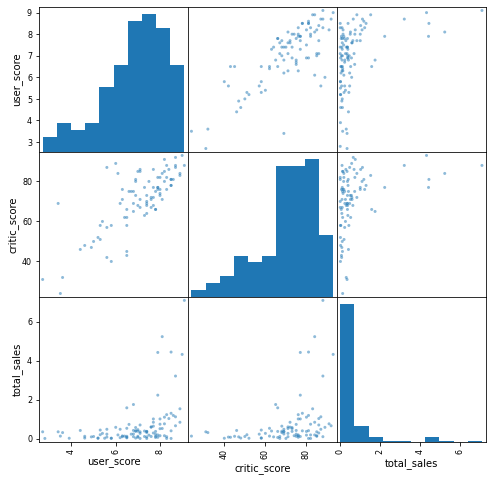

,user_score,critic_score,total_sales
user_score,1.000000,0.77008,0.400219
critic_score,0.770080,1.00000,0.348380
total_sales,0.400219,0.34838,1.000000


Влияние отзывов пользователей и критиков на продажи платформы Wii


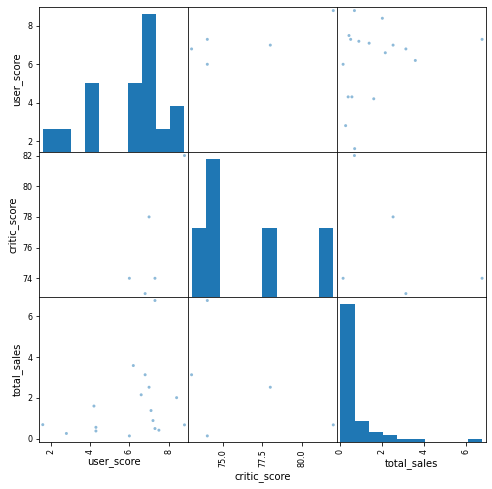

,user_score,critic_score,total_sales
user_score,1.000000,0.816295,0.296197
critic_score,0.816295,1.000000,-0.424341
total_sales,0.296197,-0.424341,1.000000


Влияние отзывов пользователей и критиков на продажи платформы PC


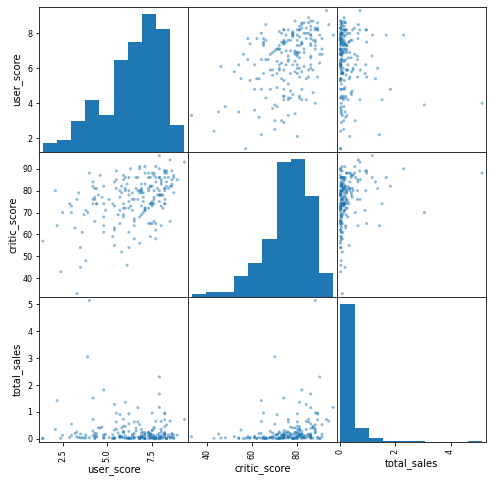

,user_score,critic_score,total_sales
user_score,1.000000,0.432587,-0.121867
critic_score,0.432587,1.000000,0.237243
total_sales,-0.121867,0.237243,1.000000


Влияние отзывов пользователей и критиков на продажи платформы PSV


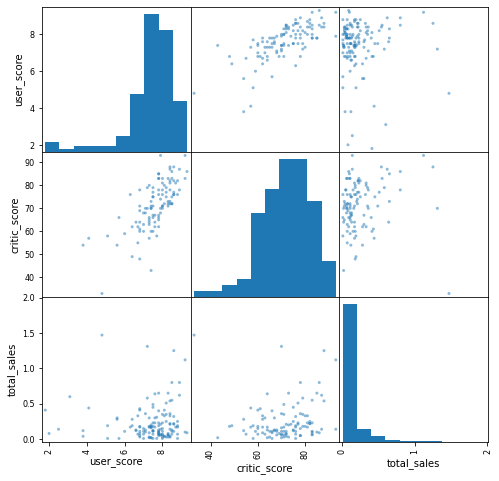

,user_score,critic_score,total_sales
user_score,1.000000,0.699199,-0.004339
critic_score,0.699199,1.000000,0.094488
total_sales,-0.004339,0.094488,1.000000


Влияние отзывов пользователей и критиков на продажи платформы PSP


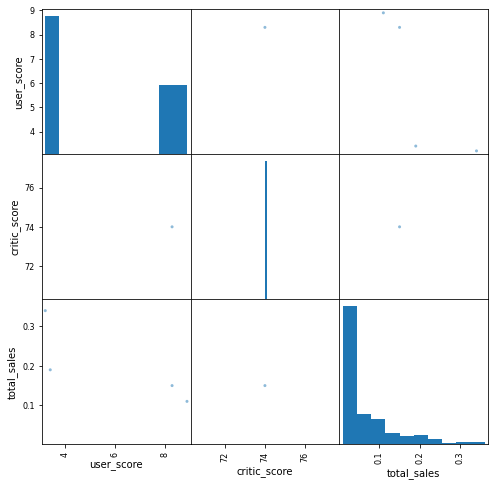

,user_score,critic_score,total_sales
user_score,1.000000,NaN,-0.802302
critic_score,NaN,NaN,NaN
total_sales,-0.802302,NaN,1.000000


In [78]:
# Изучаем, как влияют на продажи платформы отзывы пользователей и критиков.
for i in correct_df['platform'].unique():
    tmp_df = correct_df.loc[correct_df['platform']==i,['user_score', 'critic_score', 'total_sales']]
    print(f'Влияние отзывов пользователей и критиков на продажи платформы {i}')
    pd.plotting.scatter_matrix(tmp_df,figsize=(8,8))
    plt.show()
    display(tmp_df.corr())

Вывод: Оценка пользователей имеет разные показания в различных платформах, поэтому могу сделать вывод, что оценка пользователей корреляции не имеет. Оценки критиков имеют слабую корриляцию с продажами.

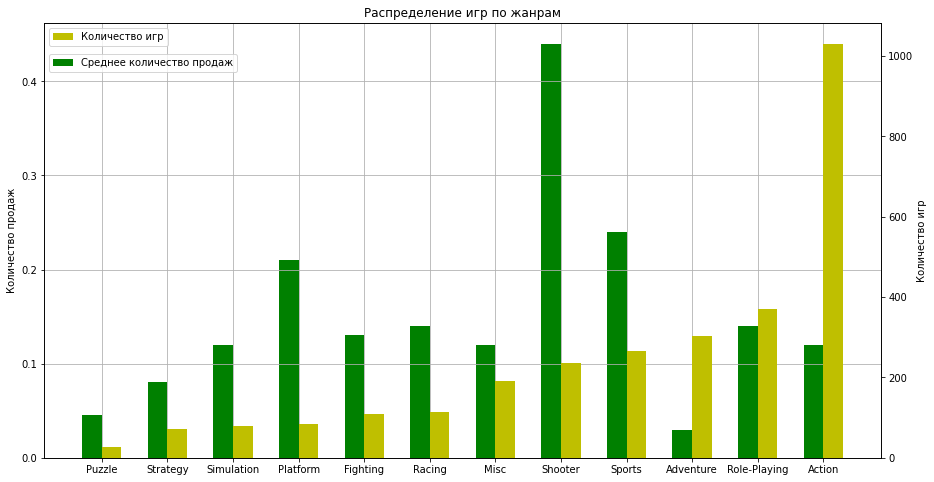

In [77]:
sum_genres_df = correct_df.pivot_table(index='genre', values='total_sales', aggfunc=['median', 'count'])
sum_genres_df.columns = sum_genres_df.columns.droplevel()
sum_genres_df.columns = ['total_sales', 'count']

fig,ax = plt.subplots(figsize=(15,8))
ax1 = ax.twinx()

x_ticks_tmp = [[i-0.15 for i in range(1,13)], [i+0.15 for i in range(1,13)]]

ax.bar(x=x_ticks_tmp[0], height=sum_genres_df.sort_values('count')['total_sales'],\
       label='Среднее количество продаж', color='g', width=0.3)
ax1.bar(x=x_ticks_tmp[1], height=sum_genres_df.sort_values('count')['count'],\
        label='Количество игр', color='y', width=0.3)
ax.set_ylabel('Количество продаж')
ax1.set_ylabel('Количество игр')
plt.title('Распределение игр по жанрам')
plt.xticks(range(1,13), labels=sum_genres_df.sort_values('count').index)
ax.grid(True)
ax.legend(bbox_to_anchor=(0.237,0.94))
ax1.legend()
plt.show()

Самым продаваемым по медиане, является Шутер, после идет жанр Спорт и Платформеры
Больше всего выпускают Экшены, РПГ, Приключения, Спорт и шутеры. 
Приключения имеют очень много игр, но почти не продаются.
Симуляторами ситуация с шутерами, что их не так много, но они имеют отличные продажи.

### Шаг 4. Составление портрета пользователей


In [23]:
# Создаю сводную таблицу по платформам для каждого региона и добавляю в столбцы проценты 
top_reg_platform = correct_df.pivot_table(index='platform', values=['eu_sales', 'jp_sales', 'na_sales'],
                                          aggfunc='sum')
top_reg_platform['reg_na_plat_sales'] = top_reg_platform['na_sales'].apply(lambda x: x / top_reg_platform['na_sales']
                                                                           .sum()).round(2)
top_reg_platform['reg_eu_plat_sales'] = top_reg_platform['eu_sales'].apply(lambda x: x / top_reg_platform['eu_sales']
                                                                           .sum()).round(2)
top_reg_platform['reg_jp_plat_sales'] = top_reg_platform['jp_sales'].apply(lambda x: x / top_reg_platform['jp_sales']
                                                                           .sum()).round(2)

# Выявляю топ платформ для каждого региона
rel_column_temp = ['reg_na_plat_sales', 'reg_eu_plat_sales', 'reg_jp_plat_sales']
temp_column = ['na_sales', 'eu_sales', 'jp_sales']
for i in temp_column:
    print(f'Топ самых популярных по суммарным продажам в сегменте {i}')
    display(top_reg_platform.sort_values(i, ascending=False).loc[:,[i, rel_column_temp[temp_column.index(i)]]][:5])

Топ самых популярных по суммарным продажам в сегменте na_sales


,na_sales,reg_na_plat_sales
platform,,
X360,140.05,0.24
PS4,108.74,0.18
PS3,103.38,0.17
XOne,93.12,0.16
3DS,55.31,0.09


Топ самых популярных по суммарным продажам в сегменте eu_sales


,eu_sales,reg_eu_plat_sales
platform,,
PS4,141.09,0.28
PS3,106.85,0.21
X360,74.52,0.15
XOne,51.59,0.10
3DS,42.64,0.08


Топ самых популярных по суммарным продажам в сегменте jp_sales


,jp_sales,reg_jp_plat_sales
platform,,
3DS,87.79,0.46
PS3,35.29,0.18
PSV,21.04,0.11
PS4,15.96,0.08
WiiU,13.01,0.07


    В Северной Америке лидирует X360 (24%) и PS4 (18%)
    В Европе лидирует PS4(28%), PS3(21%)
    В Японии лидирует 3DS(46%), PS3(18%)

In [24]:
# Создаю сводную таблицу по жанрам для каждого региона и добавляю в столбцы проценты 
top_reg_genres = correct_df.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'],
                                          aggfunc='sum')
top_reg_genres['reg_na_genre_sales'] = top_reg_genres['na_sales'].apply(lambda x: x / top_reg_genres['na_sales']
                                                                           .sum()).round(2)
top_reg_genres['reg_eu_genre_sales'] = top_reg_genres['eu_sales'].apply(lambda x: x / top_reg_genres['eu_sales']
                                                                           .sum()).round(2)
top_reg_genres['reg_jp_genre_sales'] = top_reg_genres['jp_sales'].apply(lambda x: x / top_reg_genres['jp_sales']
                                                                           .sum()).round(2)

# Выявляю топ жанров для каждого региона
rel_column_temp = ['reg_na_genre_sales', 'reg_eu_genre_sales', 'reg_jp_genre_sales']
temp_column = ['na_sales', 'eu_sales', 'jp_sales']
for i in temp_column:
    print(f'Топ самых популярных по суммарным продажам в сегменте {i}')
    display(top_reg_genres.sort_values(i, ascending=False).loc[:,[i, rel_column_temp[temp_column.index(i)]]][:5])

Топ самых популярных по суммарным продажам в сегменте na_sales


,na_sales,reg_na_genre_sales
genre,,
Action,177.84,0.30
Shooter,144.77,0.24
Sports,81.53,0.14
Role-Playing,64.00,0.11
Misc,38.19,0.06


Топ самых популярных по суммарным продажам в сегменте eu_sales


,eu_sales,reg_eu_genre_sales
genre,,
Action,159.34,0.31
Shooter,113.47,0.22
Sports,69.08,0.14
Role-Playing,48.53,0.10
Racing,27.29,0.05


Топ самых популярных по суммарным продажам в сегменте jp_sales


,jp_sales,reg_jp_genre_sales
genre,,
Role-Playing,65.44,0.34
Action,52.80,0.27
Misc,12.86,0.07
Simulation,10.41,0.05
Fighting,9.44,0.05


    В Европе и Америке топ занимают Эшкн, Шутер, Спорт
    В Японии топ занимают РПГ, Экшн

In [80]:
ESRB_reg = correct_df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
                                          aggfunc='sum')

ESRB_reg['ESRB_na'] = ESRB_reg['na_sales'].apply(lambda x: x / ESRB_reg['na_sales']
                                                                           .sum()).round(2)
ESRB_reg['ESRB_eu'] = ESRB_reg['eu_sales'].apply(lambda x: x / ESRB_reg['eu_sales']
                                                                           .sum()).round(2)
ESRB_reg['ESRB_jp'] = ESRB_reg['jp_sales'].apply(lambda x: x / ESRB_reg['jp_sales']
                                                                           .sum()).round(2)

rel_column_temp = ['ESRB_na', 'ESRB_eu', 'ESRB_jp']
temp_column = ['na_sales', 'eu_sales', 'jp_sales']
for i in temp_column:
    print(f'Топ самых популярных игр по суммарным продажам разделены по рейтингу в {i}')
    display(ESRB_reg.sort_values(i, ascending=False).loc[:,[i, rel_column_temp[temp_column.index(i)]]][:5])

Топ самых популярных игр по суммарным продажам разделены по рейтингу в na_sales


,na_sales,ESRB_na
rating,,
M,231.57,0.39
E,114.37,0.19
unknown,103.31,0.17
E10+,75.70,0.13
T,66.02,0.11


Топ самых популярных игр по суммарным продажам разделены по рейтингу в eu_sales


,eu_sales,ESRB_eu
rating,,
M,193.96,0.38
E,113.02,0.22
unknown,91.50,0.18
E10+,55.37,0.11
T,52.96,0.10


Топ самых популярных игр по суммарным продажам разделены по рейтингу в jp_sales


,jp_sales,ESRB_jp
rating,,
unknown,108.84,0.57
E,28.33,0.15
T,26.02,0.14
M,21.20,0.11
E10+,8.19,0.04


    В Европе и Америке самые продаваемые игры, которые имеют рейтинг это M и E
    В Японии самые продаваемые игры, которые имеют рейтинг это E и T

### Шаг 5. Проверка гипотез

Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC

    H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы
    H_a: Средние пользовательские рейтинги платформ Xbox One и PC разнятся

In [26]:
xone = correct_df.loc[correct_df['platform']=='XOne', 'user_score'].dropna()
pc = correct_df.loc[correct_df['platform']=='PC', 'user_score'].dropna()
results = st.ttest_ind(xone, pc)
print(f'p-значение: {results.pvalue} \n')
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC разнятся")
else:
    print("Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы")

p-значение: 0.5535080500643661 

Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы


Одинаковы ли средние пользовательские рейтинги жанров Action и Sports

    H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковы
    H_a: Средние пользовательские рейтинги жанров Action и Sports разнятся

In [27]:
action = correct_df.loc[correct_df['genre']=='Action', 'user_score'].dropna()
sports = correct_df.loc[correct_df['genre']=='Sports', 'user_score'].dropna()
results = st.ttest_ind(action, sports)
print(f'p-значение: {results.pvalue} \n')
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разнятся")
else:
    print("Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковы")

p-значение: 4.8045233804629176e-26 

Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разнятся


### Шаг 6. Общий вывод

Мной были изучены данные за продаж игр до 2016 года и могу сделать следующие выводы: 

    Актуальность платформ держатся около 10 лет, после чего их заменяют новые. До пика популярности проходит около 4-х лет, после продажи начинают падать. Новые платформы появляются примерно каждые 6 лет. 
    Оценки пользователей почти никак не влияют на продажи. Небольшой вес имеют оценки критиков.
    Самым популярным жанром является Action, Shooter, PRG и Sport.
    Средние пользовательские рейтинги жанров Action и Sport разнятся
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковы
    
    Если необходима стратегия, в какое направление необходимо вкладываться, то вот мои выводы:
    Вывод по Северной Америке и по Европе: 
        Самые популярные игровые платформы Xbox360 и PS4
        Самые популярные жанры: Эшкн, Шутер, Спорт
        Самые популярные рейтинги: М и E
    Вывод по Японии: 
        Самые популярные игровые платформы 3DS и PS3
        Самые популярные жанры: РПГ, Экшн
        Самые популярные рейтинги: E и T (но по данному исследованию, больше всего непроставлено оценок)
